In [5]:
import sys 
sys.path.append('../')
import pandas as pd 
import numpy as np 
import ta
import talib
import sqlite3 as sql
import matplotlib.pyplot as plt 
from backtester import * 
from fxcmtoken import major_forex_pairs

In [6]:
print(major_forex_pairs)
conn = sql.connect('../PriceData/PriceData_m5.db')
ticker = major_forex_pairs[1]
data = pd.read_sql(f"SELECT * FROM '{ticker}'", conn, parse_dates=['date'], index_col=['date'])
for col in ['open', 'close', 'high', 'low']:
    data[col] = data[['bid'+col, 'ask'+col]].mean(axis=1)
conn.close()
data

['EUR/USD', 'GBP/USD', 'USD/JPY', 'USD/CHF', 'USD/CAD', 'AUD/USD', 'NZD/USD']


,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,close,high,low
date,,,,,,,,,,,,,
2021-10-07 16:35:00,1.36270,1.36265,1.36282,1.36249,1.36284,1.36280,1.36297,1.36265,709,1.362770,1.362725,1.362895,1.362570
2021-10-07 16:40:00,1.36265,1.36246,1.36268,1.36240,1.36280,1.36262,1.36281,1.36253,558,1.362725,1.362540,1.362745,1.362465
2021-10-07 16:45:00,1.36246,1.36248,1.36260,1.36230,1.36262,1.36264,1.36275,1.36244,630,1.362540,1.362560,1.362675,1.362370
2021-10-07 16:50:00,1.36248,1.36230,1.36249,1.36222,1.36264,1.36243,1.36265,1.36236,691,1.362560,1.362365,1.362570,1.362290
2021-10-07 16:55:00,1.36230,1.36210,1.36260,1.36209,1.36243,1.36223,1.36276,1.36223,820,1.362365,1.362165,1.362680,1.362160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-25 02:35:00,1.33423,1.33408,1.33424,1.33407,1.33439,1.33425,1.33439,1.33422,164,1.334310,1.334165,1.334315,1.334145
2021-11-25 02:40:00,1.33407,1.33416,1.33428,1.33407,1.33425,1.33432,1.33443,1.33424,163,1.334160,1.334240,1.334355,1.334155
2021-11-25 02:45:00,1.33416,1.33407,1.33417,1.33405,1.33431,1.33422,1.33431,1.33420,112,1.334235,1.334145,1.334240,1.334125


In [10]:
close = data['close']
high = data['high']
low = data['low']

In [22]:
data['dema_50'] = talib.DEMA(close, 50)
data['ema_50'] = talib.EMA(close, 50)
data['kama_50'] = talib.KAMA(close, 50)
data['midpoint_50'] = talib.MIDPOINT(close, 50)
data['midprice_50'] = talib.MIDPRICE(high, low, 50)
data['sma_50'] = talib.SMA(close, 50)
data['tema_50'] = talib.TEMA(close, 50)
data['trima_50'] = talib.TRIMA(close, 50)
data['wma_50'] = talib.WMA(close, 50)

<AxesSubplot:xlabel='date'>

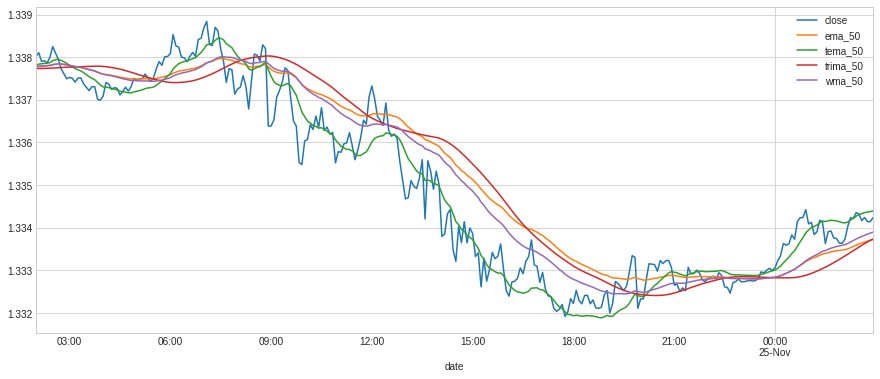

In [30]:
data[['close', 'ema_50', 'tema_50','trima_50', 'wma_50']].iloc[-300:].plot(figsize=(15,6))